#####  Classification on the Agency type

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder

In [2]:
insurance_df=pd.read_csv(r"C:\Users\BAPS\Desktop\Python\Datasets\travel insurance.csv")

In [3]:
insurance_df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


In [4]:
insurance_df.info()
# OBSERVATION -> There are 63326 records and 11 columns
# Columns > ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name','Claim', 'Destination', 'Gender'] are object type rest are numeric['int64','float64']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [5]:
insurance_df_o=insurance_df.copy()

In [6]:
insurance_df.select_dtypes('object').columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Destination', 'Gender'],
      dtype='object')

In [7]:
((insurance_df.isnull().sum())/len(insurance_df))*100

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Claim                    0.000000
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Gender                  71.229827
Age                      0.000000
dtype: float64

In [8]:
total_missing = insurance_df.isnull().sum()
percentage_missing = total_missing * 100 / len(insurance_df)
missing_value_df = pd.DataFrame(data=[total_missing, percentage_missing], index=["Total", "%"]).T
missing_value_df

# OBSERVATION -> column ["Gender "] has 71% missing values

,Total,%
Agency,0.0,0.000000
Agency Type,0.0,0.000000
Distribution Channel,0.0,0.000000
Product Name,0.0,0.000000
Claim,0.0,0.000000
Duration,0.0,0.000000
Destination,0.0,0.000000
Net Sales,0.0,0.000000
Commision (in value),0.0,0.000000
Gender,45107.0,71.229827


['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Destination', 'Gender']

In [9]:
len(insurance_df["Destination"].unique())

149

In [10]:
len(insurance_df["Distribution Channel"].unique())

2

In [11]:
len(insurance_df["Product Name"].unique())

26

In [12]:
len(insurance_df["Agency"].unique())

16

In [13]:
len(insurance_df["Distribution Channel"].unique())

2

In [14]:
len(insurance_df["Agency Type"].unique())

2

In [15]:
len(insurance_df["Gender"].unique())

3

In [16]:
encoder=LabelEncoder()

In [17]:
insurance_df['Gender']=encoder.fit_transform(insurance_df['Gender'])
insurance_df['Agency']=encoder.fit_transform(insurance_df['Agency'])
insurance_df["Agency Type"]=encoder.fit_transform(insurance_df["Agency Type"])
insurance_df["Distribution Channel"]=encoder.fit_transform(insurance_df["Distribution Channel"])
insurance_df['Product Name']=encoder.fit_transform(insurance_df["Product Name"])
insurance_df["Destination"]=encoder.fit_transform(insurance_df["Destination"])
insurance_df['Claim']=encoder.fit_transform(insurance_df['Claim'])

In [18]:
insurance_df.drop(["Gender"],axis=1,inplace=True)
# Since gender is binary categorical data and has 71% missing values,it is not feasible to handle missing values,therefore droping this column

In [19]:
insurance_df.drop(columns=["Destination"],inplace=True)
# Droping this column because, there are 149 unique values

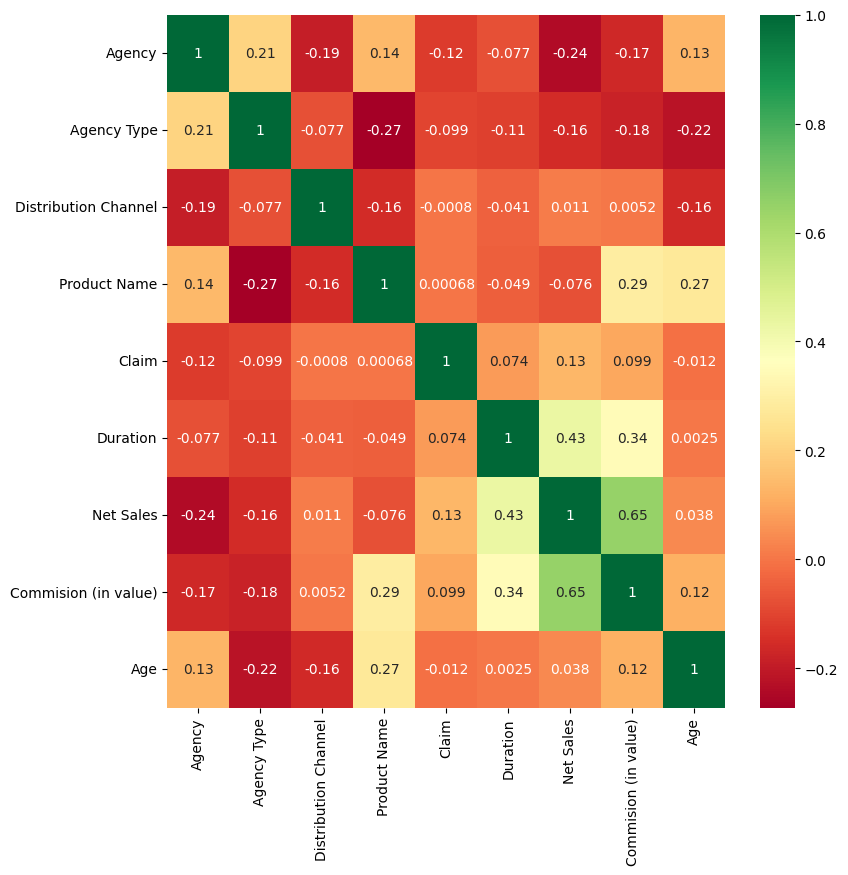

In [20]:
corr=insurance_df.corr()
plt.subplots(figsize=(9,9))
sns.heatmap(corr,cmap='RdYlGn',annot=True)
plt.show()

In [21]:
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Agency,63326.0,6.654913,2.371884,0.0,6.0,7.00,7.00,15.0
Agency Type,63326.0,0.724331,0.446854,0.0,0.0,1.00,1.00,1.0
Distribution Channel,63326.0,0.982519,0.131056,0.0,1.0,1.00,1.00,1.0
Product Name,63326.0,9.292029,6.642143,0.0,1.0,10.00,14.00,25.0
Claim,63326.0,0.014639,0.120102,0.0,0.0,0.00,0.00,1.0
Duration,63326.0,49.317074,101.791566,-2.0,9.0,22.00,53.00,4881.0
Net Sales,63326.0,40.702018,48.845637,-389.0,18.0,26.53,48.00,810.0
Commision (in value),63326.0,9.809992,19.804388,0.0,0.0,0.00,11.55,283.5
Age,63326.0,39.969981,14.017010,0.0,35.0,36.00,43.00,118.0


### Univariant Analysis

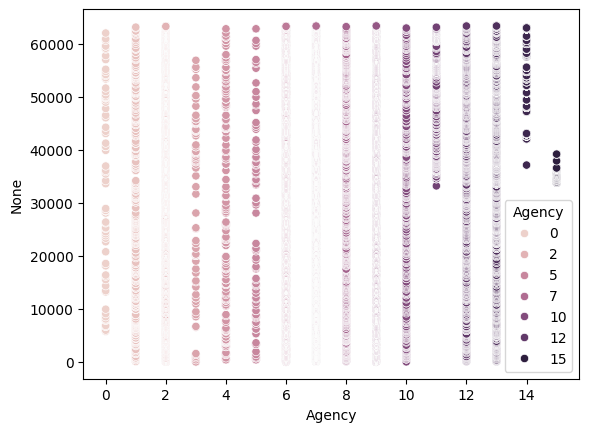

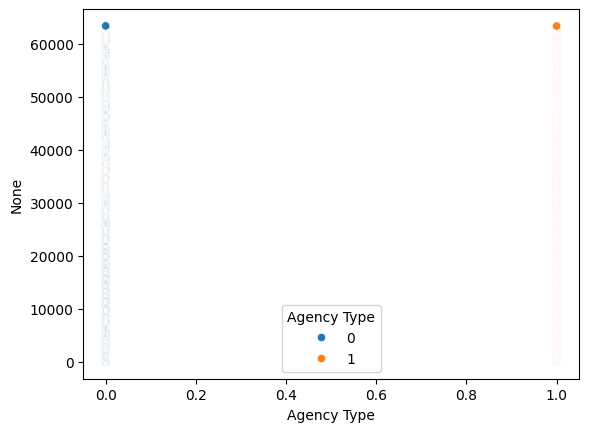

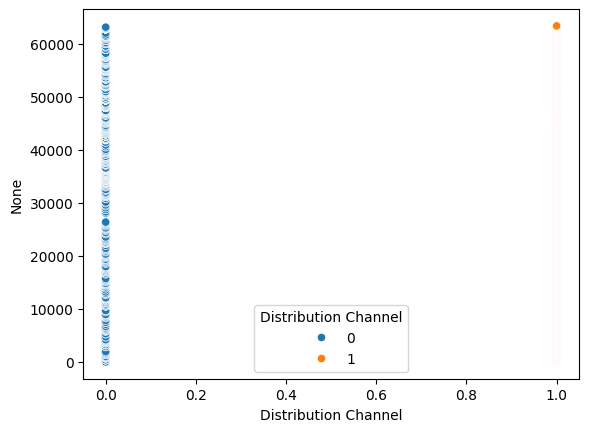

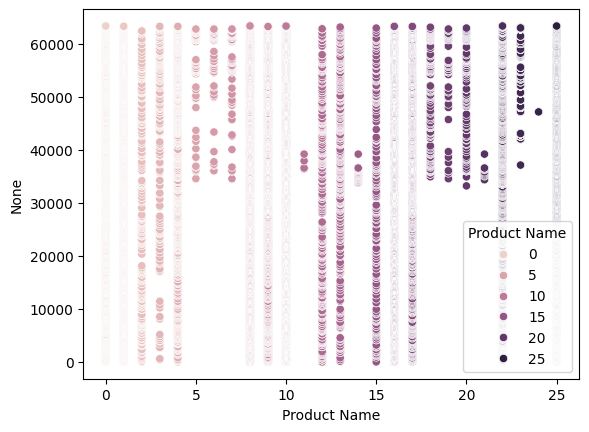

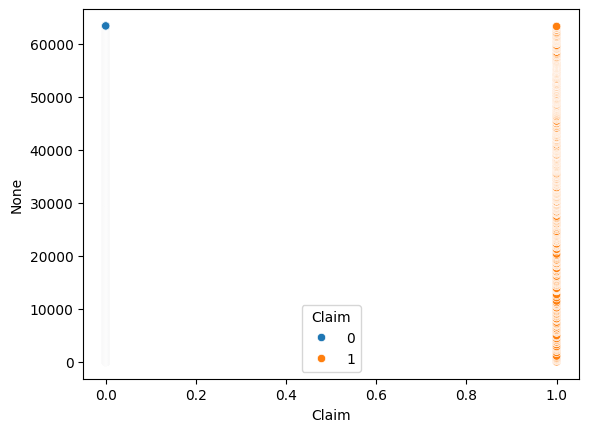

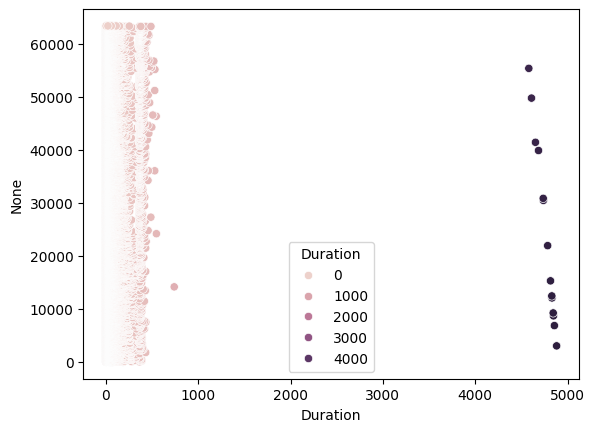

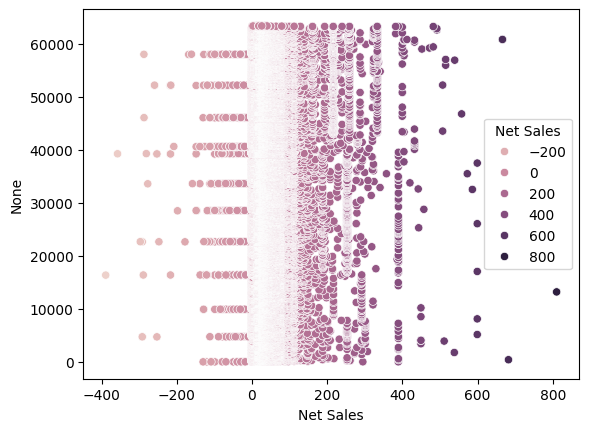

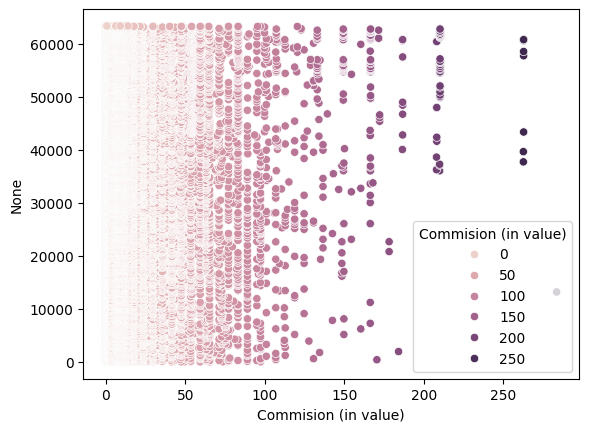

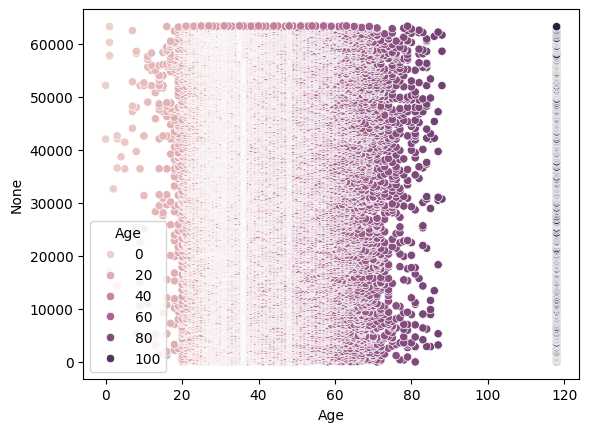

In [22]:
for col in insurance_df.columns:
    plt.figure()
    sns.scatterplot(x=insurance_df[col],data=insurance_df,y=insurance_df.index,hue=col)

<Figure size 640x480 with 0 Axes>

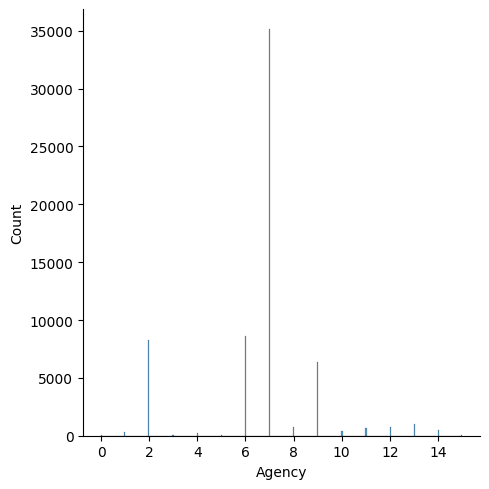

<Figure size 640x480 with 0 Axes>

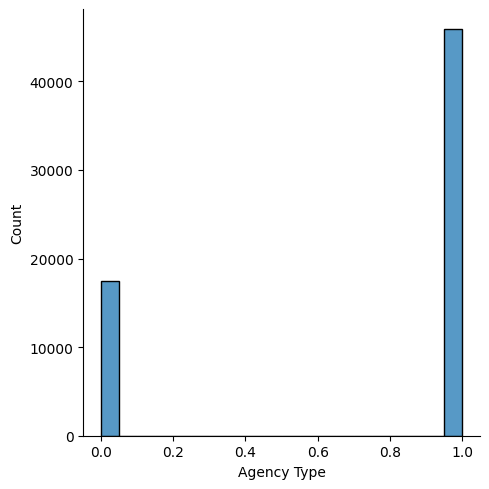

<Figure size 640x480 with 0 Axes>

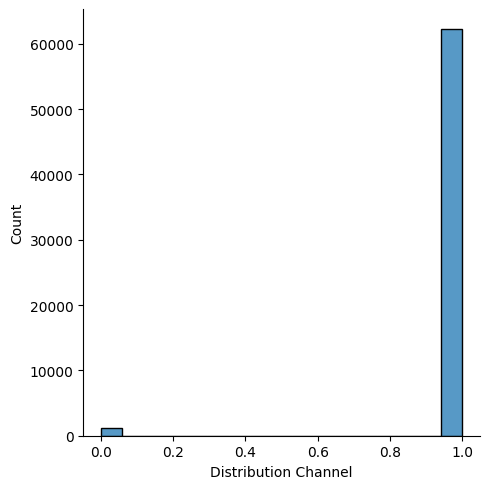

<Figure size 640x480 with 0 Axes>

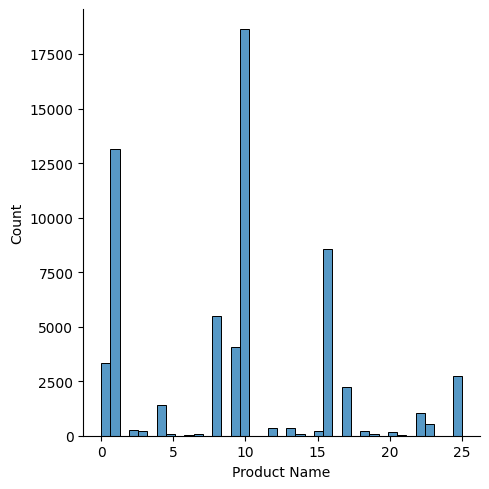

<Figure size 640x480 with 0 Axes>

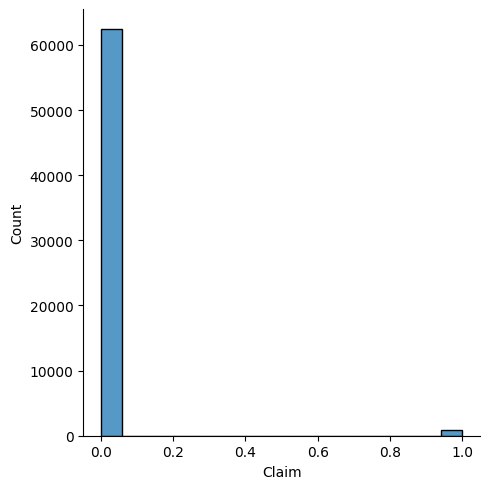

<Figure size 640x480 with 0 Axes>

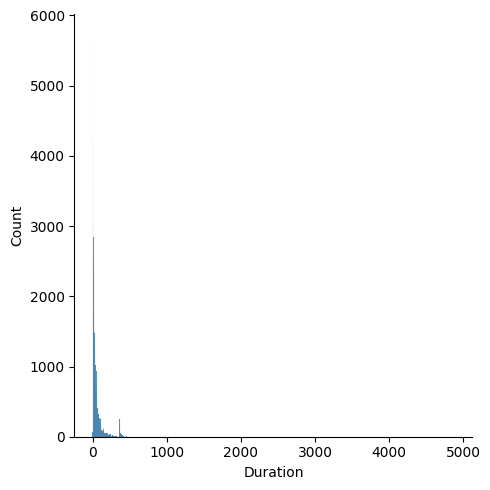

<Figure size 640x480 with 0 Axes>

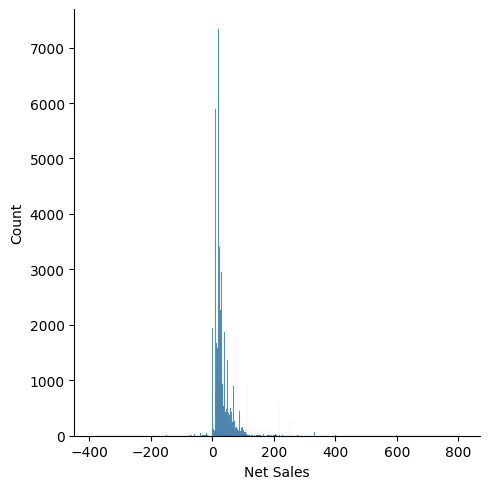

<Figure size 640x480 with 0 Axes>

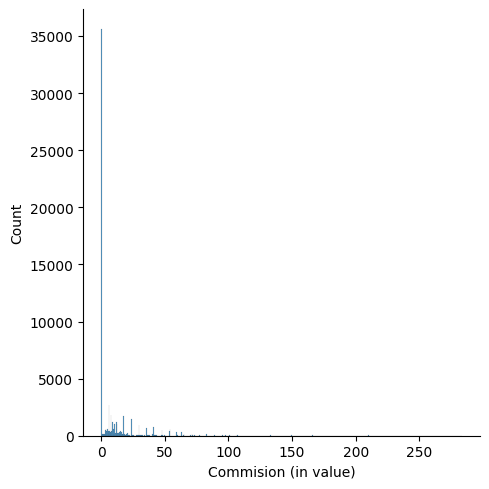

<Figure size 640x480 with 0 Axes>

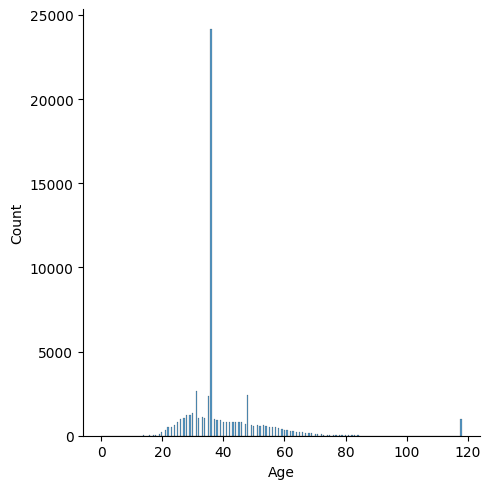

In [23]:
for col in insurance_df.columns:
    plt.figure()
    sns.displot(x=insurance_df[col],data=insurance_df)

## BiVariant Analysis

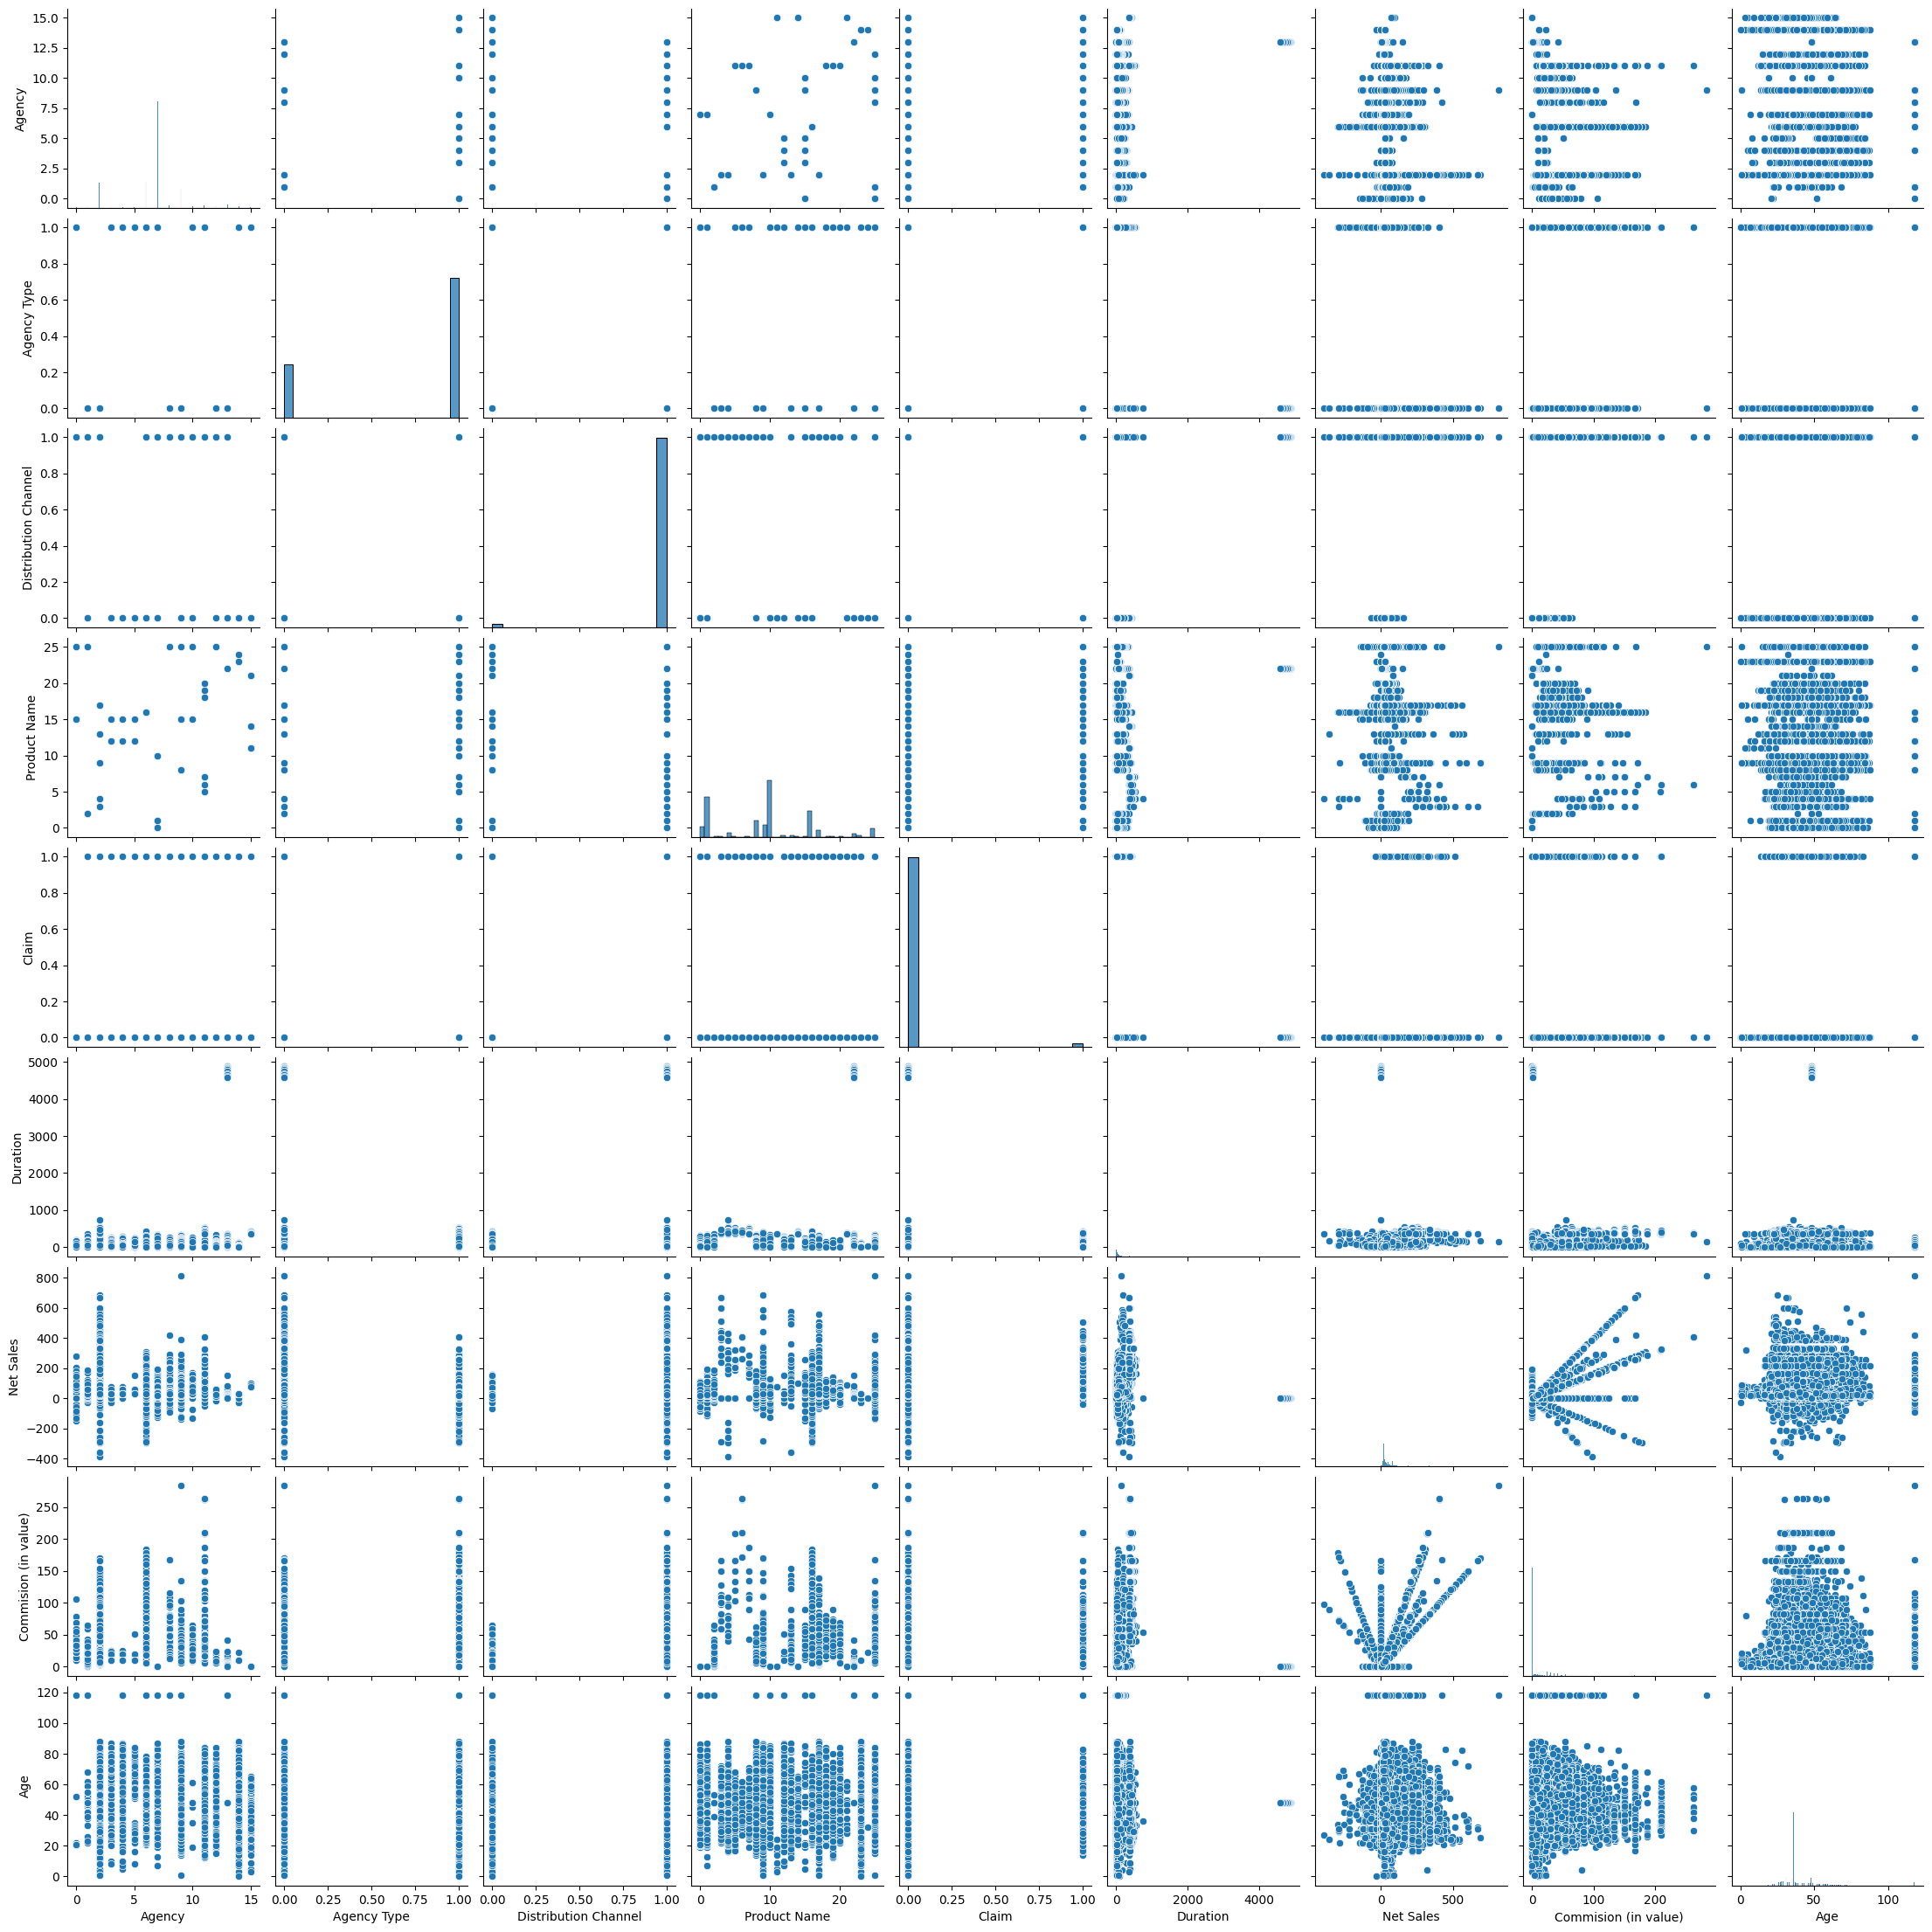

In [24]:
sns.pairplot(insurance_df)

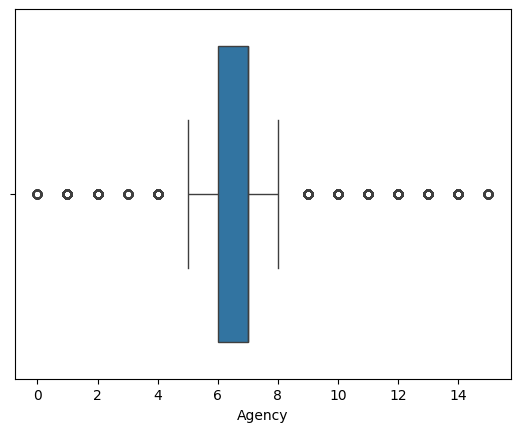

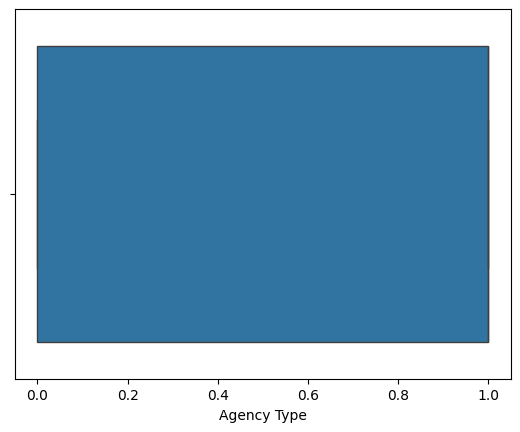

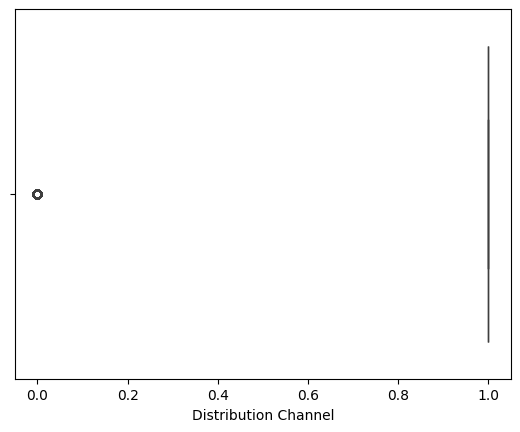

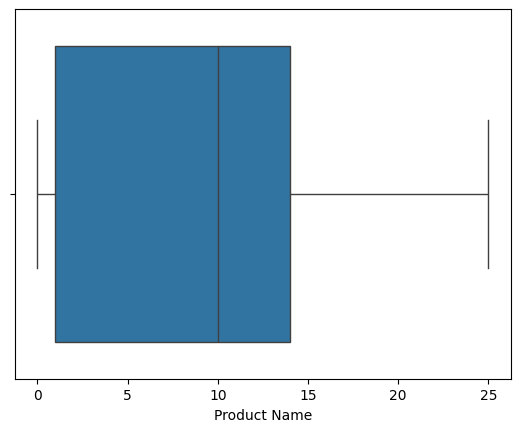

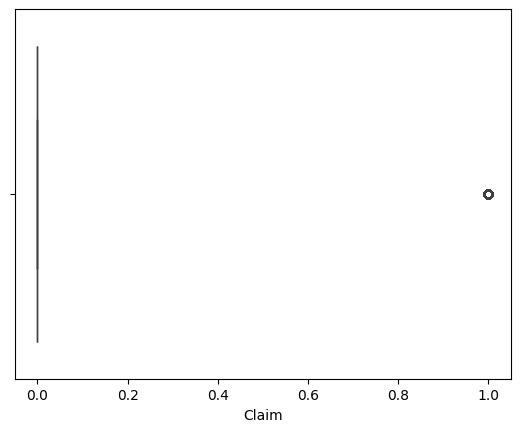

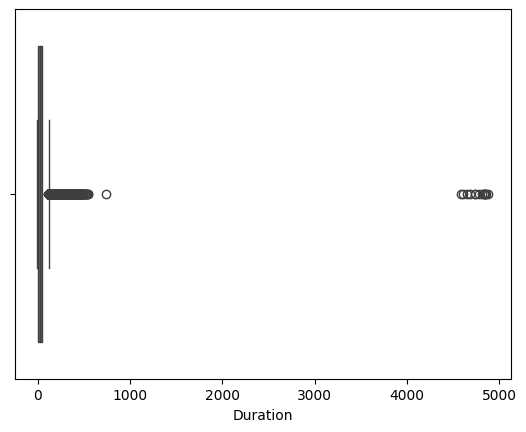

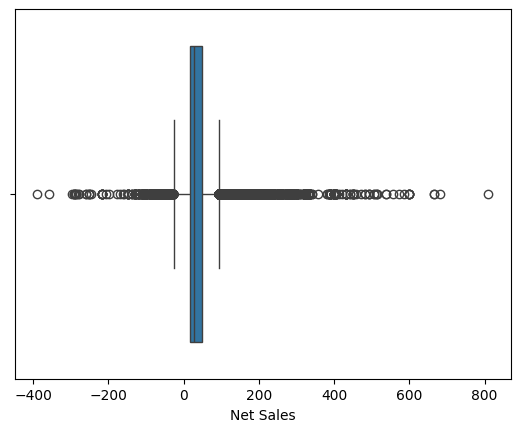

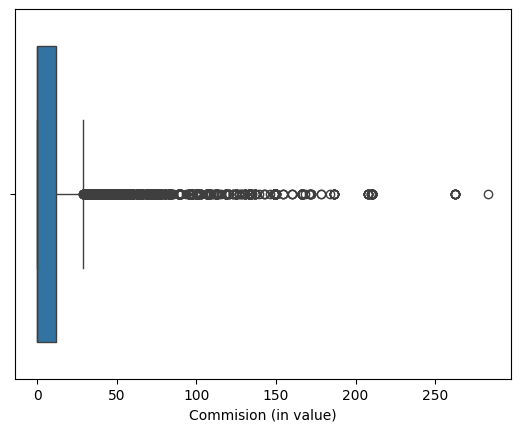

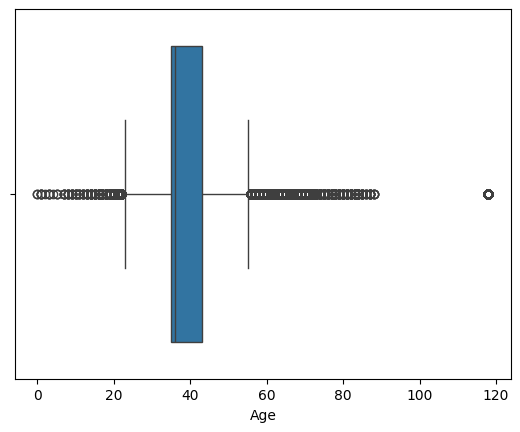

In [25]:
for col in insurance_df.columns:
    plt.figure()
    sns.boxplot(x=insurance_df[col])

### Removal of outliers

##### z-score

In [22]:
print('Before outlier removal : ',insurance_df.shape)
z = np.abs(zscore(insurance_df, axis = 1))
threshold = 3
dataset = insurance_df[(z < threshold).all(axis=1)]
print('After Z-Score approach : ',dataset.shape)

Before outlier removal :  (63326, 9)
After Z-Score approach :  (63326, 9)


In [23]:
Q1 = insurance_df.quantile(0.25)  # Q1
Q3 = insurance_df.quantile(0.75)  # Q3
IQR = Q3-Q1
dataset = insurance_df[~((insurance_df<(Q1-1.5*IQR)) | (insurance_df>(Q3+1.5*IQR)))]
print('After IQR approach : ',dataset.shape)

After IQR approach :  (63326, 9)


In [24]:
cond1=insurance_df['Duration']<1000
in_df=insurance_df.where(cond1)
in_df.dropna()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Net Sales,Commision (in value),Age
0,3.0,1.0,0.0,12.0,0.0,186.0,-29.0,9.57,81.0
1,3.0,1.0,0.0,12.0,0.0,186.0,-29.0,9.57,71.0
2,6.0,1.0,1.0,16.0,0.0,65.0,-49.5,29.70,32.0
3,6.0,1.0,1.0,16.0,0.0,60.0,-39.6,23.76,32.0
4,6.0,1.0,1.0,16.0,0.0,79.0,-19.8,11.88,41.0
...,...,...,...,...,...,...,...,...,...
63321,9.0,0.0,1.0,8.0,0.0,111.0,35.0,12.25,31.0
63322,9.0,0.0,1.0,8.0,0.0,58.0,40.0,14.00,40.0
63323,9.0,0.0,1.0,8.0,0.0,2.0,18.0,6.30,57.0
63324,9.0,0.0,1.0,8.0,0.0,3.0,18.0,6.30,63.0


In [25]:
cond2=in_df["Age"]<100
in_df=in_df.where(cond2)
in_df.dropna()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Net Sales,Commision (in value),Age
0,3.0,1.0,0.0,12.0,0.0,186.0,-29.0,9.57,81.0
1,3.0,1.0,0.0,12.0,0.0,186.0,-29.0,9.57,71.0
2,6.0,1.0,1.0,16.0,0.0,65.0,-49.5,29.70,32.0
3,6.0,1.0,1.0,16.0,0.0,60.0,-39.6,23.76,32.0
4,6.0,1.0,1.0,16.0,0.0,79.0,-19.8,11.88,41.0
...,...,...,...,...,...,...,...,...,...
63321,9.0,0.0,1.0,8.0,0.0,111.0,35.0,12.25,31.0
63322,9.0,0.0,1.0,8.0,0.0,58.0,40.0,14.00,40.0
63323,9.0,0.0,1.0,8.0,0.0,2.0,18.0,6.30,57.0
63324,9.0,0.0,1.0,8.0,0.0,3.0,18.0,6.30,63.0


In [26]:
cond3=in_df["Commision (in value)"]<200
in_df=in_df.where(cond3)
in_df.dropna()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Net Sales,Commision (in value),Age
0,3.0,1.0,0.0,12.0,0.0,186.0,-29.0,9.57,81.0
1,3.0,1.0,0.0,12.0,0.0,186.0,-29.0,9.57,71.0
2,6.0,1.0,1.0,16.0,0.0,65.0,-49.5,29.70,32.0
3,6.0,1.0,1.0,16.0,0.0,60.0,-39.6,23.76,32.0
4,6.0,1.0,1.0,16.0,0.0,79.0,-19.8,11.88,41.0
...,...,...,...,...,...,...,...,...,...
63321,9.0,0.0,1.0,8.0,0.0,111.0,35.0,12.25,31.0
63322,9.0,0.0,1.0,8.0,0.0,58.0,40.0,14.00,40.0
63323,9.0,0.0,1.0,8.0,0.0,2.0,18.0,6.30,57.0
63324,9.0,0.0,1.0,8.0,0.0,3.0,18.0,6.30,63.0


In [27]:
cond4=in_df["Net Sales"]<600
in_df=in_df.where(cond4)
in_df.dropna()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Net Sales,Commision (in value),Age
0,3.0,1.0,0.0,12.0,0.0,186.0,-29.0,9.57,81.0
1,3.0,1.0,0.0,12.0,0.0,186.0,-29.0,9.57,71.0
2,6.0,1.0,1.0,16.0,0.0,65.0,-49.5,29.70,32.0
3,6.0,1.0,1.0,16.0,0.0,60.0,-39.6,23.76,32.0
4,6.0,1.0,1.0,16.0,0.0,79.0,-19.8,11.88,41.0
...,...,...,...,...,...,...,...,...,...
63321,9.0,0.0,1.0,8.0,0.0,111.0,35.0,12.25,31.0
63322,9.0,0.0,1.0,8.0,0.0,58.0,40.0,14.00,40.0
63323,9.0,0.0,1.0,8.0,0.0,2.0,18.0,6.30,57.0
63324,9.0,0.0,1.0,8.0,0.0,3.0,18.0,6.30,63.0


In [28]:
cond5=in_df["Age"]>0
in_df=in_df.where(cond5)
in_df.dropna()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Net Sales,Commision (in value),Age
0,3.0,1.0,0.0,12.0,0.0,186.0,-29.0,9.57,81.0
1,3.0,1.0,0.0,12.0,0.0,186.0,-29.0,9.57,71.0
2,6.0,1.0,1.0,16.0,0.0,65.0,-49.5,29.70,32.0
3,6.0,1.0,1.0,16.0,0.0,60.0,-39.6,23.76,32.0
4,6.0,1.0,1.0,16.0,0.0,79.0,-19.8,11.88,41.0
...,...,...,...,...,...,...,...,...,...
63321,9.0,0.0,1.0,8.0,0.0,111.0,35.0,12.25,31.0
63322,9.0,0.0,1.0,8.0,0.0,58.0,40.0,14.00,40.0
63323,9.0,0.0,1.0,8.0,0.0,2.0,18.0,6.30,57.0
63324,9.0,0.0,1.0,8.0,0.0,3.0,18.0,6.30,63.0


In [29]:
cond6=in_df["Net Sales"]>-300
in_df=in_df.where(cond6)
in_df.dropna()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Net Sales,Commision (in value),Age
0,3.0,1.0,0.0,12.0,0.0,186.0,-29.0,9.57,81.0
1,3.0,1.0,0.0,12.0,0.0,186.0,-29.0,9.57,71.0
2,6.0,1.0,1.0,16.0,0.0,65.0,-49.5,29.70,32.0
3,6.0,1.0,1.0,16.0,0.0,60.0,-39.6,23.76,32.0
4,6.0,1.0,1.0,16.0,0.0,79.0,-19.8,11.88,41.0
...,...,...,...,...,...,...,...,...,...
63321,9.0,0.0,1.0,8.0,0.0,111.0,35.0,12.25,31.0
63322,9.0,0.0,1.0,8.0,0.0,58.0,40.0,14.00,40.0
63323,9.0,0.0,1.0,8.0,0.0,2.0,18.0,6.30,57.0
63324,9.0,0.0,1.0,8.0,0.0,3.0,18.0,6.30,63.0


In [30]:
in_df.skew()

Agency                 -0.133982
Agency Type            -1.060847
Distribution Channel   -7.691419
Product Name            0.361702
Claim                   8.080151
Duration                3.174970
Net Sales               3.166420
Commision (in value)    3.482599
Age                     1.205627
dtype: float64

In [31]:
in_df.kurt()

Agency                   1.612838
Agency Type             -0.874632
Distribution Channel    57.159765
Product Name            -0.341770
Claim                   63.290877
Duration                10.808884
Net Sales               17.252225
Commision (in value)    16.976463
Age                      1.954965
dtype: float64

In [32]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
in_df["Commision (in value)"]= quantile_transformer.fit_transform(in_df["Commision (in value)"].values.reshape(-1, 1)).flatten()

In [33]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
in_df["Net Sales"]= quantile_transformer.fit_transform(in_df["Net Sales"].values.reshape(-1, 1)).flatten()

In [34]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
in_df["Age"]= quantile_transformer.fit_transform(in_df["Age"].values.reshape(-1, 1)).flatten()

In [35]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
in_df["Duration"]= quantile_transformer.fit_transform(in_df["Duration"].values.reshape(-1, 1)).flatten()

In [36]:
in_df.dropna(inplace=True)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X=in_df.drop(["Agency Type"],axis=1)
Y=in_df["Agency Type"]

In [39]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.80)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(49810, 8)
(12453, 8)
(49810,)
(12453,)


#### Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

## Logistic Regression


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
lr = make_pipeline(
    LogisticRegression(max_iter=2000))
lr.fit(X_train_scaled, y_train)

Pipeline(steps=[('logisticregression', LogisticRegression(max_iter=2000))])

In [46]:
y_pred = lr.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
specificity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Specificity -> ",specificity)
 

Accuracy: 0.7942664418212478

Confusion Matrix:
 [[2495  921]
 [1641 7396]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.73      0.66      3416
         1.0       0.89      0.82      0.85      9037

    accuracy                           0.79     12453
   macro avg       0.75      0.77      0.76     12453
weighted avg       0.81      0.79      0.80     12453

Specificity ->  0.8184131902179927


## Support Vector Classifier

In [47]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=42) # Using a linear kernel for simplicity
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
specificity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Specificity -> ",specificity)
 

Accuracy: 0.9963061109772745

Confusion Matrix:
 [[3411    5]
 [  41 8996]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3416
         1.0       1.00      1.00      1.00      9037

    accuracy                           1.00     12453
   macro avg       0.99      1.00      1.00     12453
weighted avg       1.00      1.00      1.00     12453

Specificity ->  0.9954630961602302


## KNN Clasifier

1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097 1098 1099 Distortion values:
1000 : 0.07048900333128615
1001 : 0.07046420567865254
1002 : 0.07035493095052277
1003 : 0.07030632175895789
1004 : 0.07022478382946143
1005 : 0.07016578542690335
1006 : 0.07009059368417025
1007 : 0.07002849964637982
1008 : 0.06998582137960348
1009 : 0.06990421884187309
1010 : 0.06987113616783976
1011 : 0.06980037965537932
1012 : 0.06971970317859577
1013 : 0.0696764501148461
1014 : 0.06961746213145685
1015 : 0.06958114266339846
1016 : 0.06950822906536688
1017 : 0.06943440452482

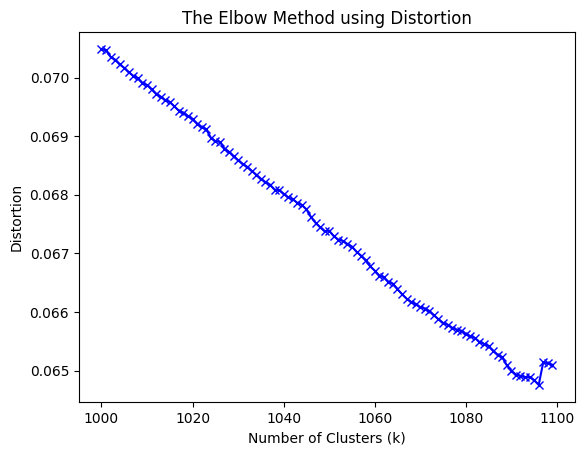

In [78]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1000, 1100)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X_train_scaled)
    
    distortions.append(sum(np.min(cdist(X_train_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])
    
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = distortions[-1]   
    mapping2[k] = inertias[-1]
    print(k,end=" ")

print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1096)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
specificity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Specificity -> ",specificity)    

Accuracy: 0.9710913033004095

Confusion Matrix:
 [[3236  180]
 [ 180 8857]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      3416
         1.0       0.98      0.98      0.98      9037

    accuracy                           0.97     12453
   macro avg       0.96      0.96      0.96     12453
weighted avg       0.97      0.97      0.97     12453

Specificity ->  0.9800818855814983


## Decision Tree Classifier

#### criterion -> gini

In [49]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train_scaled, y_train)
y_pred = clf_gini.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
specificity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Specificity -> ",specificity)

Accuracy: 0.9753473058700715

Confusion Matrix:
 [[3331   85]
 [ 222 8815]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      3416
         1.0       0.99      0.98      0.98      9037

    accuracy                           0.98     12453
   macro avg       0.96      0.98      0.97     12453
weighted avg       0.98      0.98      0.98     12453

Specificity ->  0.9754343255505146


#### criterion -> entropy

In [50]:
from sklearn.tree import DecisionTreeClassifier
clf_ent = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)
clf_ent.fit(X_train_scaled, y_train)
y_pred = clf_ent.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
specificity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Specificity -> ",specificity)

Accuracy: 0.9753473058700715

Confusion Matrix:
 [[3331   85]
 [ 222 8815]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      3416
         1.0       0.99      0.98      0.98      9037

    accuracy                           0.98     12453
   macro avg       0.96      0.98      0.97     12453
weighted avg       0.98      0.98      0.98     12453

Specificity ->  0.9754343255505146


#### criterion -> log-loss

In [51]:
from sklearn.tree import DecisionTreeClassifier
clf_ll = DecisionTreeClassifier(criterion="log_loss", max_depth=3, random_state=0)
clf_ll.fit(X_train_scaled, y_train)
y_pred = clf_ll.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
specificity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Specificity -> ",specificity)

Accuracy: 0.9753473058700715

Confusion Matrix:
 [[3331   85]
 [ 222 8815]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      3416
         1.0       0.99      0.98      0.98      9037

    accuracy                           0.98     12453
   macro avg       0.96      0.98      0.97     12453
weighted avg       0.98      0.98      0.98     12453

Specificity ->  0.9754343255505146


## Naive-Bayes

#### GaussianNB

In [52]:
from sklearn.naive_bayes import GaussianNB
gauss_model=GaussianNB()
gauss_model.fit(X_train_scaled,y_train)
y_pred = gauss_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
specificity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Specificity -> ",specificity)

Accuracy: 0.8561792339195374

Confusion Matrix:
 [[3416    0]
 [1791 7246]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.66      1.00      0.79      3416
         1.0       1.00      0.80      0.89      9037

    accuracy                           0.86     12453
   macro avg       0.83      0.90      0.84     12453
weighted avg       0.91      0.86      0.86     12453

Specificity ->  0.8018147615359079


#### MultinomialNB
- this can't be used when we have negative values in the data

In [53]:
# from sklearn.naive_bayes import MultinomialNB
# gauss_model=MultinomialNB()
# gauss_model.fit(X_train_scaled,y_train)
# y_pred = lr.predict(X_test_scaled)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

#### BernoulliNB

In [54]:
from sklearn.naive_bayes import BernoulliNB
bern_model=BernoulliNB()
bern_model.fit(X_train_scaled,y_train)
y_pred = bern_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
specificity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Specificity -> ",specificity)

Accuracy: 0.8280735565727134

Confusion Matrix:
 [[3080  336]
 [1805 7232]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      0.90      0.74      3416
         1.0       0.96      0.80      0.87      9037

    accuracy                           0.83     12453
   macro avg       0.79      0.85      0.81     12453
weighted avg       0.87      0.83      0.84     12453

Specificity ->  0.8002655748589134


### Random Forest Cassifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000,max_depth=8,max_features=12)
rf.fit(X_train_scaled,y_train)
y_pred = rf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
specificity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Specificity -> ",specificity)

Accuracy: 1.0

Confusion Matrix:
 [[3416    0]
 [   0 9037]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3416
         1.0       1.00      1.00      1.00      9037

    accuracy                           1.00     12453
   macro avg       1.00      1.00      1.00     12453
weighted avg       1.00      1.00      1.00     12453

Specificity ->  1.0


## XGBoost Classifier

In [56]:
import xgboost as xgb
xgc=xgb.XGBClassifier(learning_rate=0.5,
                    n_estimators=10,
                    max_depth = 15)

xgc.fit(X_train_scaled,y_train)
y_pred = xgc.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
specificity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Specificity -> ",specificity)

Accuracy: 0.9999196980647234

Confusion Matrix:
 [[3415    1]
 [   0 9037]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3416
         1.0       1.00      1.00      1.00      9037

    accuracy                           1.00     12453
   macro avg       1.00      1.00      1.00     12453
weighted avg       1.00      1.00      1.00     12453

Specificity ->  1.0


## LightGBM

In [57]:
import lightgbm as lgm
lgc=lgm.LGBMClassifier(learning_rate=0.01,
                    n_estimators=600,
                    max_depth = 10)

lgc.fit(X_train_scaled,y_train)
y_pred = lgc.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
specificity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Specificity -> ",specificity)

[LightGBM] [Info] Number of positive: 36682, number of negative: 13128
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 876
[LightGBM] [Info] Number of data points in the train set: 49810, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.736438 -> initscore=1.027539
[LightGBM] [Info] Start training from score 1.027539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 1.0

Confusion Matrix:
 [[3416    0]
 [   0 9037]]

Classification Report:
               precision    recall  f1-score   sup

c:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## GradientBoosting Classifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(loss="exponential", # {'exponential', 'log_loss'}
                                learning_rate=0.01,
                                n_estimators=600,
                                max_depth = 10,
                                max_features = 5)

gbc.fit(X_train_scaled,y_train)
y_pred = gbc.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
specificity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Specificity -> ",specificity)

Accuracy: 1.0

Confusion Matrix:
 [[3416    0]
 [   0 9037]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3416
         1.0       1.00      1.00      1.00      9037

    accuracy                           1.00     12453
   macro avg       1.00      1.00      1.00     12453
weighted avg       1.00      1.00      1.00     12453

Specificity ->  1.0


## AdaBoost

In [59]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier( n_estimators=50, learning_rate=0.1, random_state=42)
abc.fit(X_train_scaled,y_train)

y_pred = abc.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
specificity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Specificity -> ",specificity)

Accuracy: 0.9764715329639444

Confusion Matrix:
 [[3416    0]
 [ 293 8744]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      3416
         1.0       1.00      0.97      0.98      9037

    accuracy                           0.98     12453
   macro avg       0.96      0.98      0.97     12453
weighted avg       0.98      0.98      0.98     12453

Specificity ->  0.9675777359743277


## CatBoost

In [60]:
from catboost import CatBoostClassifier
cbc=CatBoostClassifier(loss_function='Logloss') # [ Logloss, CrossEntropy, MultiClass, MultiClassOneVsAll ]
cbc.fit(X_train_scaled,y_train)
y_pred = cbc.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
specificity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Specificity -> ",specificity)

Learning rate set to 0.054662
0:	learn: 0.4922193	total: 184ms	remaining: 3m 4s
1:	learn: 0.3597410	total: 209ms	remaining: 1m 44s
2:	learn: 0.2539350	total: 234ms	remaining: 1m 17s
3:	learn: 0.1821860	total: 254ms	remaining: 1m 3s
4:	learn: 0.1302411	total: 274ms	remaining: 54.5s
5:	learn: 0.0926920	total: 294ms	remaining: 48.6s
6:	learn: 0.0647019	total: 312ms	remaining: 44.2s
7:	learn: 0.0451027	total: 329ms	remaining: 40.8s
8:	learn: 0.0321334	total: 348ms	remaining: 38.3s
9:	learn: 0.0236397	total: 364ms	remaining: 36.1s
10:	learn: 0.0175976	total: 381ms	remaining: 34.2s
11:	learn: 0.0138815	total: 401ms	remaining: 33s
12:	learn: 0.0106792	total: 424ms	remaining: 32.2s
13:	learn: 0.0081548	total: 445ms	remaining: 31.3s
14:	learn: 0.0072177	total: 462ms	remaining: 30.3s
15:	learn: 0.0057338	total: 477ms	remaining: 29.3s
16:	learn: 0.0046358	total: 492ms	remaining: 28.5s
17:	learn: 0.0041994	total: 509ms	remaining: 27.8s
18:	learn: 0.0037912	total: 525ms	remaining: 27.1s
19:	learn: 

## Extra Tree Classifier

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)

# Training the model
extra_tree_forest.fit(X_train_scaled, y_train)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
feature_importance

array([0.33417827, 0.01560699, 0.2062899 , 0.00067178, 0.0010768 ,
       0.01155692, 0.42573993, 0.00487942])

In [64]:
y_pred = extra_tree_forest.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
specificity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Specificity -> ",specificity)

Accuracy: 0.9999196980647234

Confusion Matrix:
 [[3416    0]
 [   1 9036]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3416
         1.0       1.00      1.00      1.00      9037

    accuracy                           1.00     12453
   macro avg       1.00      1.00      1.00     12453
weighted avg       1.00      1.00      1.00     12453

Specificity ->  0.9998893438087861


# Hyper Parameter Tuning


## GridSearchCV 

#### Gradient Boosting

In [80]:
from sklearn.model_selection import GridSearchCV

In [89]:
parameters = {
    "loss":["log_loss"],    #{'exponential', 'log_loss'}
    "learning_rate": [0.01, 0.025, 0.05],
    "min_samples_split": np.linspace(0.1, 0.5, 2),
    "min_samples_leaf": np.linspace(0.1, 0.5, 2),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["squared_error","friedman_mse"],
    "subsample":[0.5, 0.618],
    "n_estimators":[5]
    }

gsv_gbc=GridSearchCV(GradientBoostingClassifier(),parameters,refit=True,cv=2,n_jobs=1)
gsv_gbc.fit(X_train_scaled,y_train)
best_dt = gsv_gbc.best_estimator_
y_pred = best_dt.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
specificity = cm[0,0] / (cm[0,0] + cm[0,1])  
print("Specificity -> ",specificity)

Accuracy: 0.7256885890949972

Confusion Matrix:
 [[   0 3416]
 [   0 9037]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      3416
         1.0       0.73      1.00      0.84      9037

    accuracy                           0.73     12453
   macro avg       0.36      0.50      0.42     12453
weighted avg       0.53      0.73      0.61     12453

Specificity ->  0.0


c:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### Logistic Regression

In [90]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_scaled,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(0.001), 'penalty': 'l2'}
accuracy : 0.806384260188717


c:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\BAPS\AppData\L

In [91]:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train_scaled,y_train)
print("score",logreg2.score(x_test,y_test))

score 0.7283385529591263


c:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### Decision Tree

In [97]:
gsc_dtc = DecisionTreeClassifier(ccp_alpha=0.01, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, 

                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=1024, splitter='best')

gsc_dtc.fit(X_train_scaled,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5,
                       max_features=5, random_state=1024)

In [98]:
y_pred = gsc_dtc.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
specificity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Specificity -> ",specificity)

Accuracy: 0.9983939612944672

Confusion Matrix:
 [[3403   13]
 [   7 9030]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3416
         1.0       1.00      1.00      1.00      9037

    accuracy                           1.00     12453
   macro avg       1.00      1.00      1.00     12453
weighted avg       1.00      1.00      1.00     12453

Specificity ->  0.9992254066615027


### Random Forest

In [100]:
param_grid = { 
    'n_estimators': [200, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_scaled, y_train)

c:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py"

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=8, max_features=12,
                                              n_estimators=1000),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 100]})

In [101]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [102]:
y_pred = CV_rfc.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
specificity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Specificity -> ",specificity)

Accuracy: 0.9999196980647234

Confusion Matrix:
 [[3415    1]
 [   0 9037]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3416
         1.0       1.00      1.00      1.00      9037

    accuracy                           1.00     12453
   macro avg       1.00      1.00      1.00     12453
weighted avg       1.00      1.00      1.00     12453

Specificity ->  1.0


In [105]:
rfc1=RandomForestClassifier(random_state=42, max_features=6, n_estimators= 200, max_depth=8, criterion='gini')

In [108]:
rfc1.fit(X_train_scaled, y_train)
# rfc1.best_params_

RandomForestClassifier(max_depth=8, max_features=6, n_estimators=200,
                       random_state=42)

In [109]:
y_pred = rfc1.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
specificity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Specificity -> ",specificity)

Accuracy: 1.0

Confusion Matrix:
 [[3416    0]
 [   0 9037]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3416
         1.0       1.00      1.00      1.00      9037

    accuracy                           1.00     12453
   macro avg       1.00      1.00      1.00     12453
weighted avg       1.00      1.00      1.00     12453

Specificity ->  1.0


### SVM

In [113]:
svm = SVC()
# param_grid = {'C':[0.01,0.05,0.1,1,10, 100, 1000],'kernel':['linear','rbf'], 'gamma':['scale','auto'] }
param_grid = {'C': [1],
              'gamma': [1],
              'kernel': ['rbf']}
grid = GridSearchCV(svm,param_grid)
grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1], 'gamma': [1], 'kernel': ['rbf']})

In [114]:
grid_svc = grid.predict(X_test_scaled)
print(classification_report(y_test,grid_svc))   

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3416
         1.0       1.00      1.00      1.00      9037

    accuracy                           1.00     12453
   macro avg       1.00      1.00      1.00     12453
weighted avg       1.00      1.00      1.00     12453



In [115]:
y_pred = grid.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
specificity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Specificity -> ",specificity)

Accuracy: 0.9993575845177869

Confusion Matrix:
 [[3410    6]
 [   2 9035]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3416
         1.0       1.00      1.00      1.00      9037

    accuracy                           1.00     12453
   macro avg       1.00      1.00      1.00     12453
weighted avg       1.00      1.00      1.00     12453

Specificity ->  0.9997786876175722
